# Titanic Survivality Analysis
#### *By Salem Eid*

    Problem definition — What business problem are we trying to solve? How can it be phrased as a machine learning problem?
    Data — If machine learning is getting insights out of data, what data we have? How does it match the problem definition? Is our data structured or unstructured? Static or streaming?
    Evaluation — What defines success? Is a 95% accurate machine learning model good enough?
    Features — What parts of our data are we going to use for our model? How can what we already know influence this?
    Modelling — Which model should you choose? How can you improve it? How do you compare it with other models?
    Experimentation — What else could we try? Does our deployed model do as we expected? How do the other steps change based on what we’ve found?

## 1. Problem Definition

Predict which passengers surbvived the Titanic shipwreck. In othe words to answer the following question:
* what sorts of people were more likely to survive using data ?
Classification Model

## 2. Data
The data is collected from kaggle on-going competition in the following link :
    https://www.kaggle.com/c/titanic/overview
    

# 3. Evaluation: 
Percentage of passenger to correctly predict(accuracy)

# 4. Features

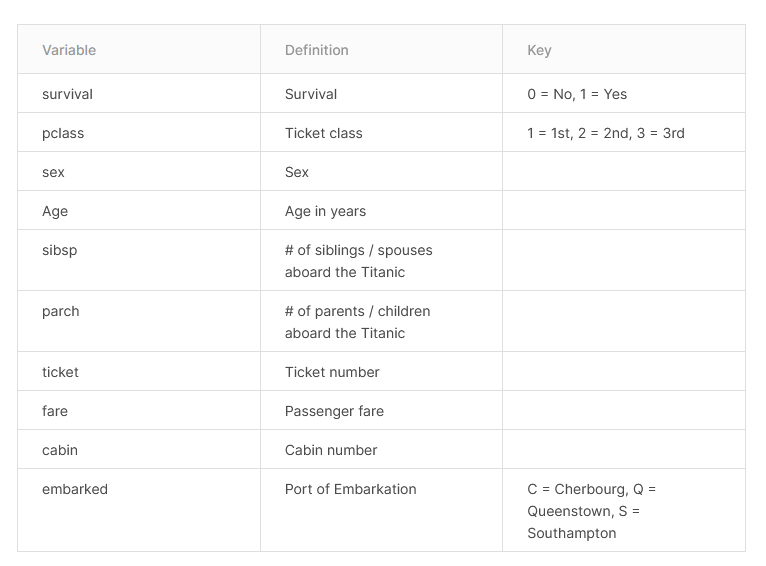


**Variable Notes**

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

### EDA


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [93]:
# Getting the training dataset
df = pd.read_csv("./data/train.csv")

In [94]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
df.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,0,1,1,1,0
Pclass,3,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


In [96]:
df.drop("Name",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)
df.drop("Cabin",axis=1,inplace=True)

In [97]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [99]:
# Checking missing data
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [100]:
pd.crosstab(df.Survived,df.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


Survived,0,1
Sex,,
female,9.09,26.15
male,52.53,12.23


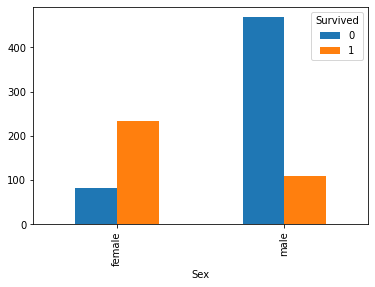

In [101]:
pd.crosstab(df.Sex,df.Survived).plot.bar();
pd.crosstab(df.Sex,df.Survived,normalize=True).round(4)*100

In [102]:
pd.crosstab(df.Sex,df.Survived).apply(lambda r: r/r.sum(), axis=1).round(4)*100

Survived,0,1
Sex,,
female,25.80,74.20
male,81.11,18.89


We can infer from the charts the female survived more than males

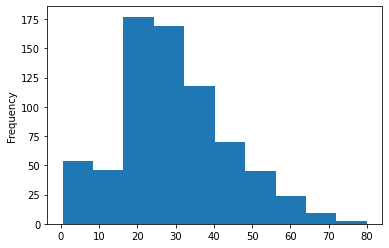

In [103]:
df.Age.plot.hist();

People who were on board of the Titanic we between the age of 20 and 40

Survived,0,1
Parch,,
0,49.94,26.15
1,5.95,7.30
2,4.49,4.49
3,0.22,0.34
4,0.45,0.00
5,0.45,0.11
6,0.11,0.00


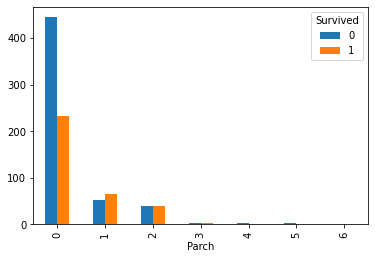

In [104]:
pd.crosstab(df.Parch,df.Survived).plot.bar();
pd.crosstab(df.Parch,df.Survived,normalize=True).round(4)*100

Survived,0,1
SibSp,,
0,44.67,23.57
1,10.89,12.57
2,1.68,1.46
3,1.35,0.45
4,1.68,0.34
5,0.56,0.00
8,0.79,0.00


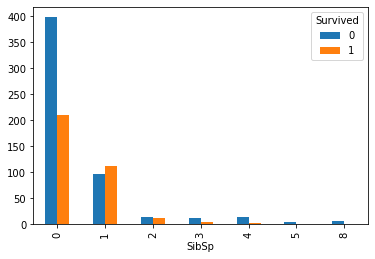

In [105]:
pd.crosstab(df.SibSp,df.Survived).plot.bar();
pd.crosstab(df.SibSp,df.Survived,normalize=True).round(4)*100

In [106]:
df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [107]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


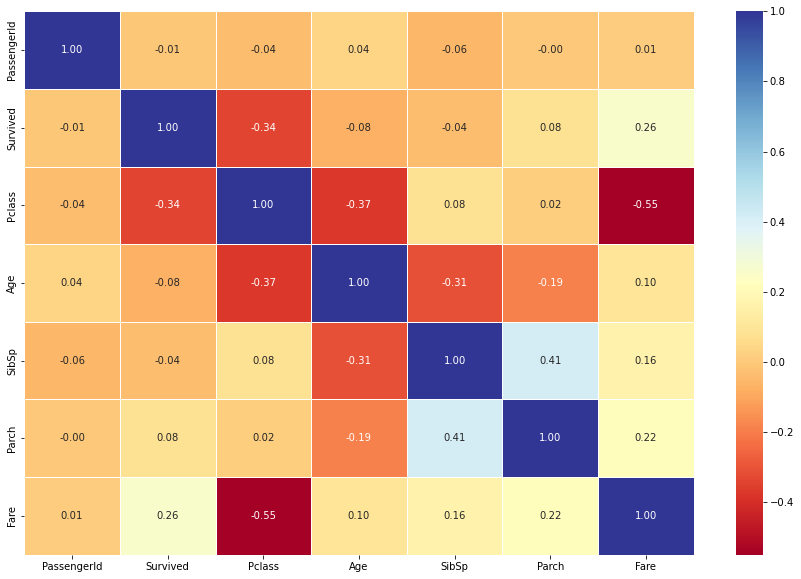

In [108]:
cor_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(cor_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="RdYlBu");


In [109]:
#

In [110]:
# Make a copy of the dataframe
df_copy = df.copy()

In [111]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [112]:
df_copy.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [113]:
# Filling missing Numerical feature with median

In [114]:
for label, content in df_copy.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_copy[label] = content.fillna(content.median())

In [115]:
# Finding strings type features
for label, content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        print(label)


Sex
Embarked


In [116]:
# Converting string type features to Nubmers for ML handling 

for label, content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        df_copy[label]= content.astype("category").cat.as_ordered()


In [117]:
for label, content in df_copy.items():
    if pd.api.types.is_categorical_dtype(content):
        print(label)


Sex
Embarked


In [118]:
# Turn categorical variables into numbers and fill missing 

for label, content in df_copy.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_copy[label + "_is_missing"] = pd.isnull(content)
        df_copy[label] = pd.Categorical(content).codes + 1


In [119]:
df_copy.isna().sum()

PassengerId            0
Survived               0
Pclass                 0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Fare                   0
Embarked               0
Sex_is_missing         0
Embarked_is_missing    0
dtype: int64

# 5. Modelling

In [120]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(79)

X = df_copy.drop("Survived",axis=1)
y = df_copy["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


clf = RandomForestClassifier()


clf.fit(X_train,y_train)




Wall time: 160 ms


RandomForestClassifier()

In [121]:
clf.score(X_test,y_test)

0.8212290502793296

Using base parameters the model score 0.79 , we will try to imporve the model using `RandomizedSearchCV`. 

In [122]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(79)

rf_grid = {"n_estimators" : [200, 500, 1000, 1400],
           "max_features" : ["auto","sqrt"],
           "min_samples_leaf" : [1,2,4],
           "min_samples_split" : [2,5,10]}


rs_clf = RandomizedSearchCV(estimator = RandomForestClassifier(),
                            param_distributions = rf_grid,
                            cv = 5,
                            n_iter = 5,
                            verbose = 2)

rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   1.9s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   1.9s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   1.8s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   1.8s
[CV] END max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1400; total time=   1.8s
[CV] END max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=2

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 500, 1000, 1400]},
                   verbose=2)

In [123]:
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt'}

In [124]:
rs_clf.score(X_test,y_test)

0.8324022346368715

In [125]:
y_preds = rs_clf.predict(X_test)

In [126]:
y_preds

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [127]:
# Import confusion_matrix and classification_report from sklearn's metrics module
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

# Import precision_score, recall_score and f1_score from sklearn's metrics module
from sklearn.metrics import precision_score, recall_score, f1_score

# Import plot_roc_curve from sklearn's metrics module
from sklearn.metrics import plot_roc_curve

In [128]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       113
           1       0.83      0.68      0.75        66

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179



In [130]:
# Testing other base models just to make sure.
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [131]:
models = {"LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier()}
results = {}

In [132]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)
results

C:\Users\salem\Desktop\ml_titanic\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\salem\Desktop\ml_titanic\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.5586592178770949,
 'KNN': 0.6536312849162011,
 'SVC': 0.6536312849162011,
 'LogisticRegression': 0.7821229050279329,
 'RandomForestClassifier': 0.8100558659217877}

In [133]:
confusion_matrix(y_test, y_preds)

array([[104,   9],
       [ 21,  45]], dtype=int64)

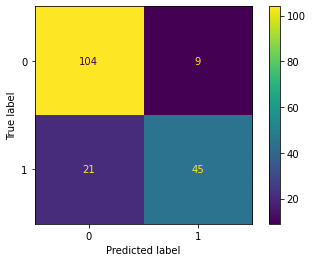

In [134]:
plot_confusion_matrix(rs_clf, X_test, y_test);

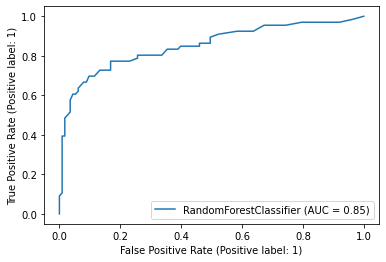

In [135]:
plot_roc_curve(clf,X_test,y_test)
plt.show()

In [139]:
df_test = pd.read_csv("data/test.csv")

In [140]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [141]:
df_test.drop("Name",axis=1,inplace=True)
df_test.drop("Ticket",axis=1,inplace=True)
df_test.drop("Cabin",axis=1,inplace=True)

In [142]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [143]:
df_test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [146]:
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_test[label] = content.fillna(content.median())

In [147]:
df_test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [150]:
for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_test[label + "_is_missing"] = pd.isnull(content)
        df_test[label] = pd.Categorical(content).codes + 1


In [151]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_is_missing,Embarked_is_missing
0,892,3,2,34.5,0,0,7.8292,2,False,False
1,893,3,1,47.0,1,0,7.0000,3,False,False
2,894,2,2,62.0,0,0,9.6875,2,False,False
3,895,3,2,27.0,0,0,8.6625,3,False,False
4,896,3,1,22.0,1,1,12.2875,3,False,False
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,2,27.0,0,0,8.0500,3,False,False
414,1306,1,1,39.0,0,0,108.9000,1,False,False
415,1307,3,2,38.5,0,0,7.2500,3,False,False
416,1308,3,2,27.0,0,0,8.0500,3,False,False


In [152]:
df_copy

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_is_missing,Embarked_is_missing
0,1,0,3,2,22.0,1,0,7.2500,3,False,False
1,2,1,1,1,38.0,1,0,71.2833,1,False,False
2,3,1,3,1,26.0,0,0,7.9250,3,False,False
3,4,1,1,1,35.0,1,0,53.1000,3,False,False
4,5,0,3,2,35.0,0,0,8.0500,3,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,2,27.0,0,0,13.0000,3,False,False
887,888,1,1,1,19.0,0,0,30.0000,3,False,False
888,889,0,3,1,28.0,1,2,23.4500,3,False,False
889,890,1,1,2,26.0,0,0,30.0000,1,False,False


In [153]:
df_test.T

,0,1,2,3,4,5,6,7,8,9,...,408,409,410,411,412,413,414,415,416,417
PassengerId,892,893,894,895,896,897,898,899,900,901,...,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309
Pclass,3,3,2,3,3,3,3,2,3,3,...,3,3,3,1,3,3,1,3,3,3
Sex,2,1,2,2,1,2,1,2,1,2,...,1,1,1,1,1,2,1,2,2,2
Age,34.5,47.0,62.0,27.0,22.0,14.0,30.0,26.0,18.0,21.0,...,27.0,3.0,27.0,37.0,28.0,27.0,39.0,38.5,27.0,27.0
SibSp,0,1,0,0,1,0,0,1,0,2,...,0,1,0,1,0,0,0,0,0,1
Parch,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
Fare,7.8292,7.0,9.6875,8.6625,12.2875,9.225,7.6292,29.0,7.2292,24.15,...,7.7208,13.775,7.75,90.0,7.775,8.05,108.9,7.25,8.05,22.3583
Embarked,2,3,2,3,3,3,2,3,1,3,...,2,3,2,2,3,3,1,3,3,1
Sex_is_missing,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Embarked_is_missing,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [155]:
y_test_preds = rs_clf.predict(df_test)

In [156]:
y_test_preds

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [160]:
df_preds = pd.DataFrame()

In [161]:
df_preds["PassengerId"] = df_test["PassengerId"]
df_preds["Survived"] = y_test_preds
df_preds

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [162]:
df_preds.to_csv("data/titanic_survived_1.csv", index=False)

In [164]:
importance = rs_clf.feature_importance_

AttributeError: 'RandomizedSearchCV' object has no attribute 'feature_importance_'

In [166]:
op_params = rs_clf.best_params_
op_params

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt'}

In [172]:

rf_op_model = RandomForestClassifier(n_estimators=500,
                                    min_samples_split=10,
                                    min_samples_leaf=1,
                                    max_features="sqrt")
rf_op_model.fit(X_train, y_train)
rf_op_model.feature_importances_

array([1.29864061e-01, 1.08024831e-01, 3.34825258e-01, 1.34329180e-01,
       4.31449941e-02, 2.94724764e-02, 1.85607011e-01, 3.45698328e-02,
       0.00000000e+00, 1.62356386e-04])

In [174]:
def plot_features(columns, importances):
    df=(pd.DataFrame({"features":columns,
                     "feature_importances":importances})
       .sort_values("feature_importances",ascending=False)
       .reset_index(drop=True))
    
    #plt the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"],df["feature_importances"])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

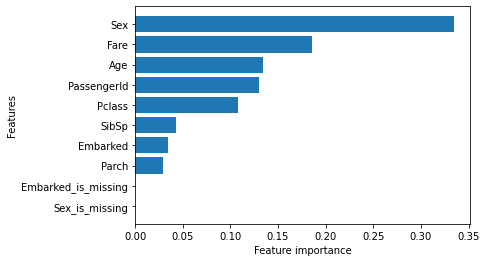

In [175]:
plot_features(X_train.columns, rf_op_model.feature_importances_)

 After review the results fro Kaggle which was `0.75` we decided to remove some features whic doesn't make sense to the data train

In [176]:
df_copy

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex_is_missing,Embarked_is_missing
0,1,0,3,2,22.0,1,0,7.2500,3,False,False
1,2,1,1,1,38.0,1,0,71.2833,1,False,False
2,3,1,3,1,26.0,0,0,7.9250,3,False,False
3,4,1,1,1,35.0,1,0,53.1000,3,False,False
4,5,0,3,2,35.0,0,0,8.0500,3,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,2,27.0,0,0,13.0000,3,False,False
887,888,1,1,1,19.0,0,0,30.0000,3,False,False
888,889,0,3,1,28.0,1,2,23.4500,3,False,False
889,890,1,1,2,26.0,0,0,30.0000,1,False,False


In [178]:
df_copy2 = df_copy.drop(['Fare','Embarked','Sex_is_missing','Embarked_is_missing'],axis=1)

In [179]:
df_copy2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,2,22.0,1,0
1,2,1,1,1,38.0,1,0
2,3,1,3,1,26.0,0,0
3,4,1,1,1,35.0,1,0
4,5,0,3,2,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,2,27.0,0,0
887,888,1,1,1,19.0,0,0
888,889,0,3,1,28.0,1,2
889,890,1,1,2,26.0,0,0


In [180]:
X2 = df_copy2.drop("Survived", axis=1)
y2 = df_copy2["Survived"]


rf_op_model.fit(X2,y2)

RandomForestClassifier(max_features='sqrt', min_samples_split=10,
                       n_estimators=500)

In [185]:
df_test2 = pd.read_csv("data/test.csv")

In [186]:
df_test2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [187]:
df_test2.drop(["Name","Ticket","Cabin","Embarked","Fare"],axis=1,inplace=True)

In [188]:
df_test2

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0
414,1306,1,female,39.0,0,0
415,1307,3,male,38.5,0,0
416,1308,3,male,NaN,0,0


In [190]:
df_test2.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
dtype: int64

In [191]:
for label, content in df_test2.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            df_test2[label] = content.fillna(content.median())

In [193]:
df_test2.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

In [194]:
for label, content in df_test2.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_test2[label + "_is_missing"] = pd.isnull(content)
        df_test2[label] = pd.Categorical(content).codes + 1


In [196]:
df_test2

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Sex_is_missing
0,892,3,2,34.5,0,0,False
1,893,3,1,47.0,1,0,False
2,894,2,2,62.0,0,0,False
3,895,3,2,27.0,0,0,False
4,896,3,1,22.0,1,1,False
...,...,...,...,...,...,...,...
413,1305,3,2,27.0,0,0,False
414,1306,1,1,39.0,0,0,False
415,1307,3,2,38.5,0,0,False
416,1308,3,2,27.0,0,0,False


In [197]:
df_test2.drop("Sex_is_missing",axis=1,inplace=True)

In [198]:
df_test2.T

,0,1,2,3,4,5,6,7,8,9,...,408,409,410,411,412,413,414,415,416,417
PassengerId,892.0,893.0,894.0,895.0,896.0,897.0,898.0,899.0,900.0,901.0,...,1300.0,1301.0,1302.0,1303.0,1304.0,1305.0,1306.0,1307.0,1308.0,1309.0
Pclass,3.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,...,3.0,3.0,3.0,1.0,3.0,3.0,1.0,3.0,3.0,3.0
Sex,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
Age,34.5,47.0,62.0,27.0,22.0,14.0,30.0,26.0,18.0,21.0,...,27.0,3.0,27.0,37.0,28.0,27.0,39.0,38.5,27.0,27.0
SibSp,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
Parch,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [204]:
y_test2_preds = rf_op_model.predict(df_test2)

In [205]:
y_test2_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [206]:
df_preds = pd.DataFrame()

In [207]:
df_preds["PassengerId"] = df_test2["PassengerId"]
df_preds["Survived"] = y_test2_preds
df_preds

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [208]:
df_preds.to_csv("data/titanic_survived_2.csv", index=False)

This scored me 0.77 a slight increase from the previous submission

In [213]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(79)

rf_grid= {"n_estimators": np.arange(100,2000,100),
         "max_depth": [None, 3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2),
          "max_features": [0.5,1,"sqrt","auto"],
          "max_samples": [500]
         }


rs_clf = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1,
                                                   random_state=79),
                                                   param_distributions=rf_grid,
                                                   n_iter=20,
                                                   cv=5,
                                                   verbose=True)

rs_clf.fit(X2,y2)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=79),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [500],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900])},
                   verbose=True)

In [214]:
rs_clf.best_params_

{'n_estimators': 300,
 'min_samples_split': 6,
 'min_samples_leaf': 5,
 'max_samples': 500,
 'max_features': 'sqrt',
 'max_depth': 5}

In [215]:
y_test3_preds = rs_clf.predict(df_test2)

In [216]:
y_test3_preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [217]:
df_preds = pd.DataFrame()

In [218]:
df_preds["PassengerId"] = df_test2["PassengerId"]
df_preds["Survived"] = y_test3_preds
df_preds

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [219]:
df_preds.to_csv("data/titanic_survived_3.csv", index=False)

In [220]:
df_test2

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,2,34.5,0,0
1,893,3,1,47.0,1,0
2,894,2,2,62.0,0,0
3,895,3,2,27.0,0,0
4,896,3,1,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,2,27.0,0,0
414,1306,1,1,39.0,0,0
415,1307,3,2,38.5,0,0
416,1308,3,2,27.0,0,0


In [221]:
df_copy4 = df_copy.drop(['Fare','Embarked','Sex_is_missing','Embarked_is_missing',"Parch","SibSp"],axis=1)

In [222]:
df_copy4

,PassengerId,Survived,Pclass,Sex,Age
0,1,0,3,2,22.0
1,2,1,1,1,38.0
2,3,1,3,1,26.0
3,4,1,1,1,35.0
4,5,0,3,2,35.0
...,...,...,...,...,...
886,887,0,2,2,27.0
887,888,1,1,1,19.0
888,889,0,3,1,28.0
889,890,1,1,2,26.0


In [223]:
X4 = df_copy4.drop("Survived", axis=1)
y4 = df_copy4["Survived"]


rs_clf.fit(X4,y4)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=79),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [500],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900])},
                   verbose=True)

In [224]:
rs_clf.best_params_

{'n_estimators': 1800,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_samples': 500,
 'max_features': 0.5,
 'max_depth': None}

In [230]:
df_test2.drop(["SibSp","Parch"],axis=1,inplace=True)

In [231]:
df_test2

,PassengerId,Pclass,Sex,Age
0,892,3,2,34.5
1,893,3,1,47.0
2,894,2,2,62.0
3,895,3,2,27.0
4,896,3,1,22.0
...,...,...,...,...
413,1305,3,2,27.0
414,1306,1,1,39.0
415,1307,3,2,38.5
416,1308,3,2,27.0


In [232]:
y_test4_preds = rs_clf.predict(df_test2)

In [217]:
df_preds = pd.DataFrame()

In [233]:
df_preds["PassengerId"] = df_test2["PassengerId"]
df_preds["Survived"] = y_test4_preds
df_preds

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [234]:
df_preds.to_csv("data/titanic_survived_4.csv", index=False)